# Simple Moving Average Stock Trading Strategy Using Python 

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


In [9]:
#Store the data
df = pd.read_csv('MSFT.csv')
#Set the date as the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Adj Close,Volume
2022-05-05,2022-05-05,285.540009,286.350006,274.339996,277.350006,274.655548,43260400
2022-05-06,2022-05-06,274.809998,279.250000,271.269989,274.730011,272.061005,37780300
2022-05-09,2022-05-09,270.059998,272.359985,263.320007,264.579987,262.009583,47726000
2022-05-10,2022-05-10,271.690002,273.750000,265.070007,269.500000,266.881805,39336400
2022-05-11,2022-05-11,265.679993,271.359985,259.299988,260.549988,258.018738,48975900
...,...,...,...,...,...,...,...
2023-04-28,2023-04-28,304.010010,308.929993,303.309998,307.260010,307.260010,36446700
2023-05-01,2023-05-01,306.970001,308.600006,305.149994,305.559998,305.559998,21294100
2023-05-02,2023-05-02,307.760010,309.179993,303.910004,305.410004,305.410004,26404400
2023-05-03,2023-05-03,306.619995,308.609985,304.089996,304.399994,304.399994,22360800


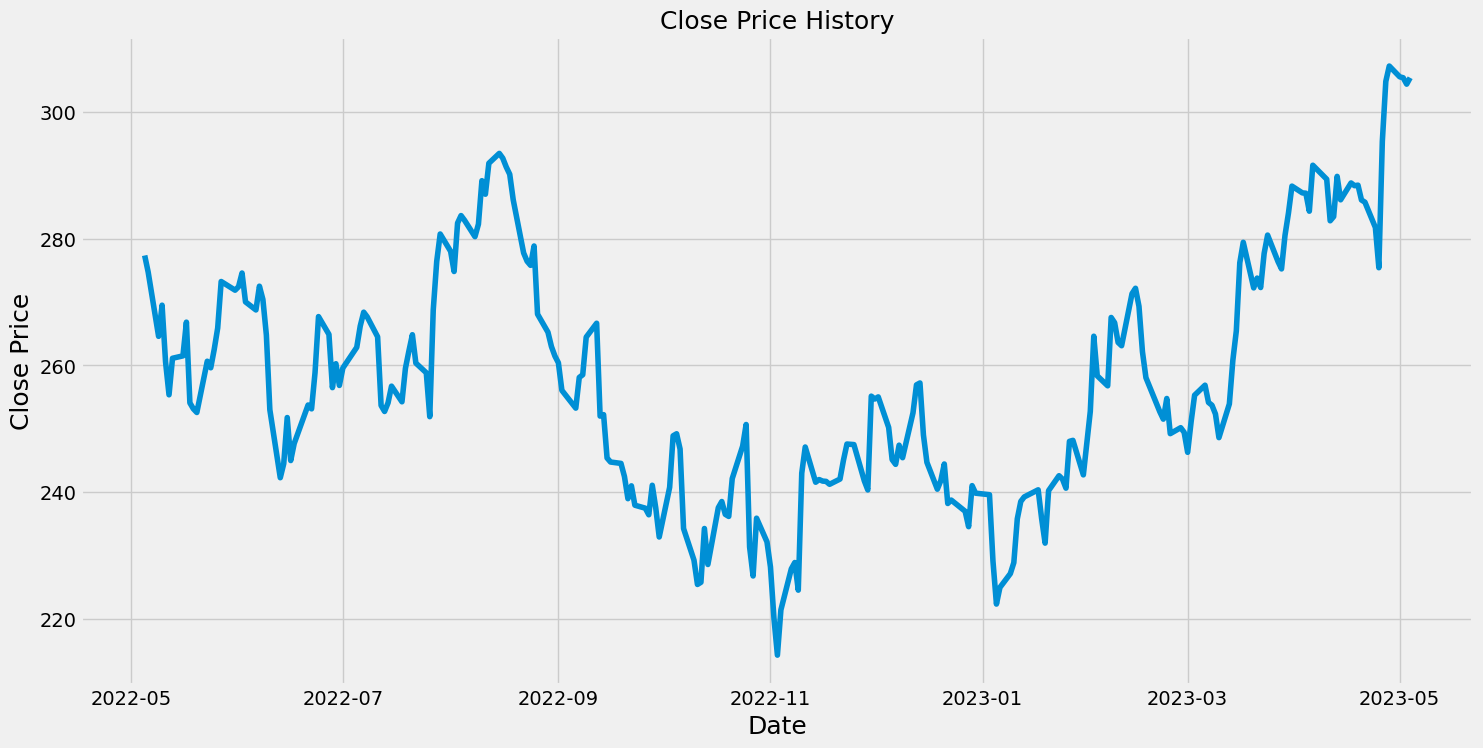

In [10]:
#Visually show the close price
plt.figure(figsize=(16,8))
plt.title('Close Price History', fontsize=18)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [12]:
#Create a function to calculate the Simple Moving Average (SMA)
def SMA(data, period= 30, column='Close'):
  return data[column].rolling(window=period).mean()

In [13]:
#Create two new columns to store the 20 day and 50 day SMA
df['SMA20']=SMA(df, 20)
df['SMA50']=SMA(df, 50)

In [14]:
#Get the buy and sell signals
df['Signal'] = np.where(df['SMA20'] > df['SMA50'], 1, 0)
df['Position'] = df['Signal'].diff()

df['Buy'] = np.where(df['Position'] == 1, df['Close'], np.NAN)
df['Sell'] = np.where(df['Position'] == -1, df['Close'], np.NAN)

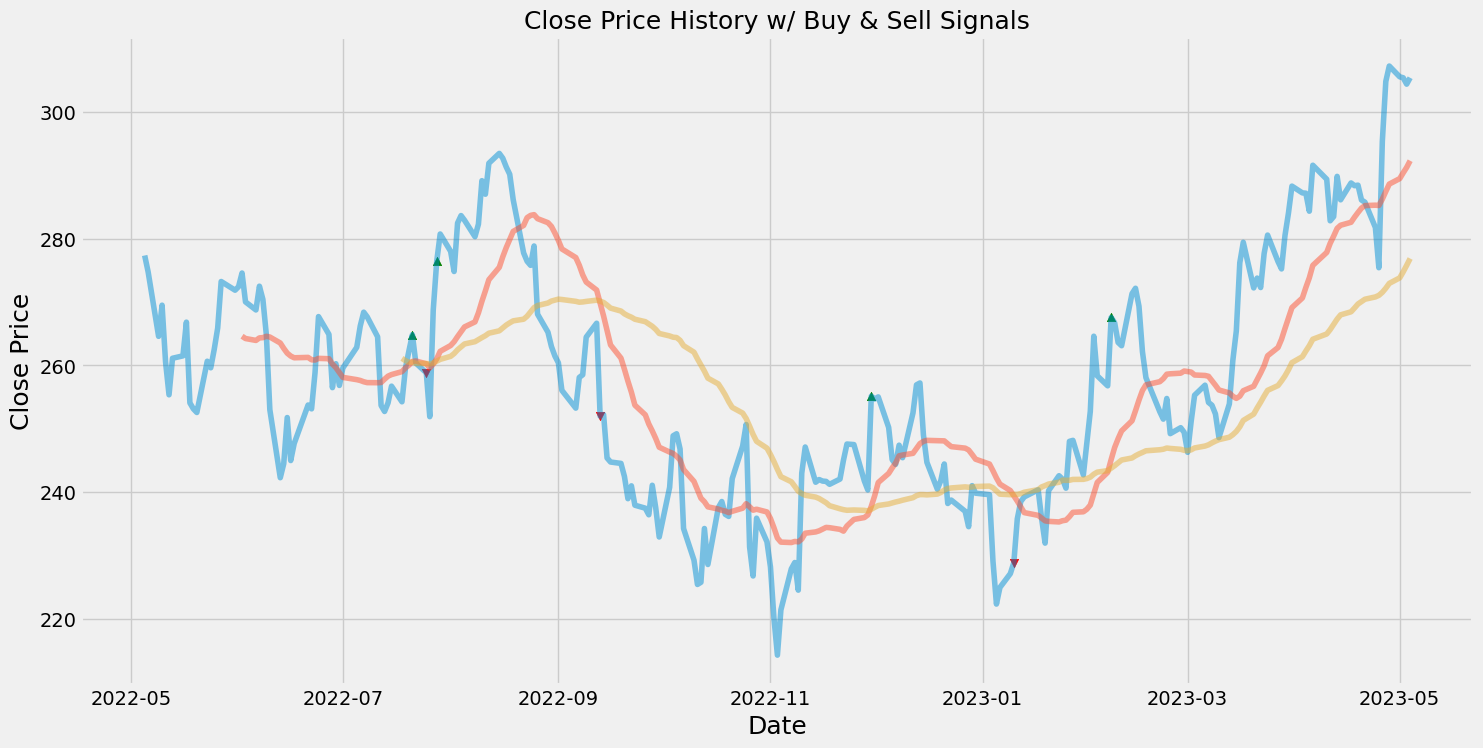

In [15]:
#Visually show the close price with the SMAs and Buy & Sell signals
plt.figure(figsize=(16,8))
plt.title('Close Price History w/ Buy & Sell Signals', fontsize=18)
plt.plot(df['Close'], alpha = 0.5, label='Close')
plt.plot(df['SMA20'], alpha = 0.5, label='SMA20')
plt.plot(df['SMA50'], alpha = 0.5, label='SMA50')
plt.scatter(df.index, df['Buy'], alpha = 1, label='Buy Signal', marker = '^', color= 'green')
plt.scatter(df.index, df['Sell'], alpha = 1, label='Sell Signal', marker = 'v', color= 'red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()